In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = [7,5,8,7,2,12,5,9,4,11,19,9,10]
y = [90,86,87,88,100,86,103,97,94,78,77,55,86]

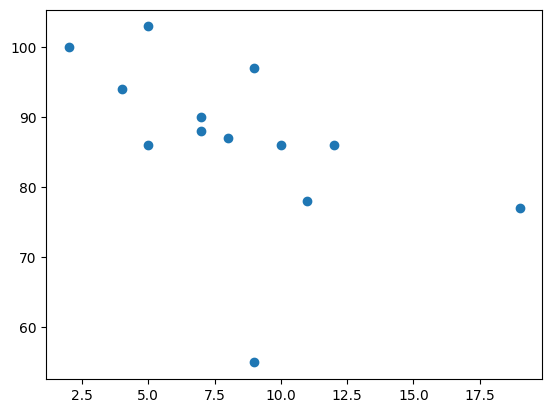

In [3]:
plt.scatter(x,y)
plt.show()

In [4]:
def ypred(slope,intercept,x):
    yp=intercept+x*slope
    return yp

In [5]:
def cost(x,y,sl,inter):
    n=len(x)
    sum=0
    for i in range(n):
        yp=ypred(sl,inter,x[i])
        sum=sum+(yp-y[i])**2 #calculates the squared error between the predicted value (yp) and the actual value
    c=0.5*sum/n
    return c
    

In [6]:
def errIntercept(x,y,sl,inter):
    sum=0
    n=len(x)
    for i in range(n):
        yp=ypred(sl,inter,x[i])
        sum=sum+(yp-y[i])
    return sum
    

In [7]:
def errSlope(x,y,sl,inter):
    sum=0
    n=len(x)
    for i in range(n):
        yp=ypred(sl,inter,x[i])
        sum=sum+(yp-y[i])*x[i]
    return sum

In [8]:
def gd(x,y,lr):
    slope=1;
    intercept=100
    c=cost(x,y,slope,intercept)
    #while c>0.00005:
    for epoch in range(500):
        intercept=intercept-lr*errIntercept(x,y,slope,intercept)/len(x)
        slope=slope-lr*errSlope(x,y,slope,intercept)/len(x)
        
        # Print only for the first 200 epochs
        if epoch < 200:
            print("Epoch ", epoch, slope, intercept)
        
        # print("Epoch ",epoch,slope,intercept)
        c=cost(x,y,slope,intercept) 
    return slope,intercept

In [9]:
sl,inter=gd(x,y,0.01)

Epoch  0 -1.1943502958579884 99.78384615384616
Epoch  1 -1.4955505035986136 99.75215371688667
Epoch  2 -1.5367273828097212 99.745800990786
Epoch  3 -1.5421905031277263 99.7429326403731
Epoch  4 -1.5427487296104556 99.74054683269075
Epoch  5 -1.5426336517560395 99.73823125882379
Epoch  6 -1.5424264766132945 99.73592928038144
Epoch  7 -1.5422070320749268 99.73363311025011
Epoch  8 -1.5419862817277985 99.73134167104307
Epoch  9 -1.5417657306643082 99.72905480696849
Epoch  10 -1.541545584856396 99.72677248883092
Epoch  11 -1.5413258718436114 99.72449470483836
Epoch  12 -1.54110659465935 99.72222144560467
Epoch  13 -1.5408877529725808 99.71995270208956
Epoch  14 -1.540669345991655 99.71768846531562
Epoch  15 -1.5404513728631384 99.71542872632946
Epoch  16 -1.5402338327265914 99.71317347619633
Epoch  17 -1.5400167247220897 99.71092270599935
Epoch  18 -1.5398000479912501 99.70867640683934
Epoch  19 -1.5395838016773755 99.70643456983484
Epoch  20 -1.5393679849254644 99.704197186122
Epoch  21 -

In [10]:
print(sl,inter)

-1.4727702667985447 99.01377511030934


In [11]:
yp=[]
for i in range(len(x)):
    yi=ypred(sl,inter,x[i])
    yp.append(yi)

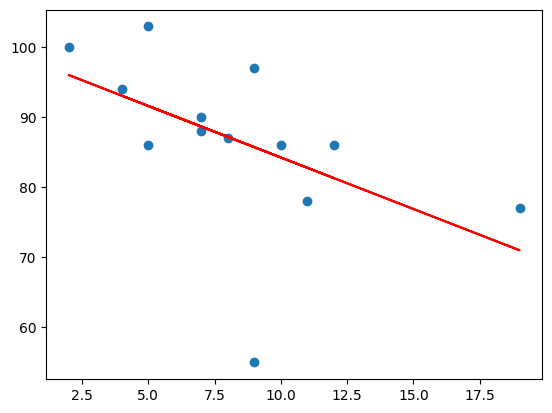

In [12]:
plt.scatter(x,y)
plt.plot(x,yp,c='r')
plt.show()

In [13]:
def sse(x,y,sl,inter): #sum of squared error
    n=len(x)
    sum=0
    for i in range(n):
        yp=ypred(sl,inter,x[i])
        sum=sum+(yp-y[i])**2
    return sum

In [14]:
def varErr(y): #Total varience
    ymean=np.mean(y)
    n=len(y)
    sum=0
    for i in range(n):
        sum=sum+(y[i]-ymean)**2
    return sum

In [15]:
def rSquared(x,y,slope,intercept): #represents the proportion of the variance in the dependent variable
    r=1-sse(x,y,slope,intercept)/ varErr(y)
    return r   

In [16]:
rSquared(x,y,sl,inter)

0.2544454674209402